In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.core.composition import OneOf
import glob
import os

In [2]:
# 경로 설정

data_path = '/workspace/#Ub370#Uc774#Ud130/Data'

img_path_train = '/workspace/#Ub370#Uc774#Ud130/Data/img/train/'
img_path_val = '/workspace/#Ub370#Uc774#Ud130/Data/img/val/'

json_path_train = '/workspace/#Ub370#Uc774#Ud130/Data/label/train/'
json_path_val = '/workspace/#Ub370#Uc774#Ud130/Data/label/val/'

segment_path_train = '/workspace/#Ub370#Uc774#Ud130/Data/segmentation/train/'
segment_path_val = '/workspace/#Ub370#Uc774#Ud130/Data/segmentation/val/'


img_path_train_anger = img_path_train + 'anger/'
img_path_val_anger = img_path_val + 'anger/'

img_path_train_happy = img_path_train + 'happy/'
img_path_val_happy = img_path_val + 'happy/'

img_path_train_panic = img_path_train + 'panic/'
img_path_val_panic = img_path_val + 'panic/'

img_path_train_sadness = img_path_train + 'sadness/'
img_path_val_sadness = img_path_val + 'sadness/'

In [3]:
df_train_anger = pd.read_csv(json_path_train + 'train_anger.csv')
df_val_anger = pd.read_csv (json_path_val + 'val_anger.csv')

df_train_happy = pd.read_csv(json_path_train + 'train_happy.csv')
df_val_happy = pd.read_csv (json_path_val + 'val_happy.csv')

df_train_panic = pd.read_csv(json_path_train + 'train_panic.csv')
df_val_panic = pd.read_csv (json_path_val + 'val_panic.csv')

df_train_sadness = pd.read_csv(json_path_train + 'train_sadness.csv')
df_val_sadness = pd.read_csv (json_path_val + 'val_sadness.csv')

In [ ]:
df_train_anger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1500 non-null   object 
 1   faceExp_uploader    1500 non-null   object 
 2   annot_A.boxes.maxX  1500 non-null   float64
 3   annot_A.boxes.maxY  1500 non-null   float64
 4   annot_A.boxes.minX  1500 non-null   float64
 5   annot_A.boxes.minY  1500 non-null   float64
 6   annot_B.boxes.maxX  1500 non-null   float64
 7   annot_B.boxes.maxY  1500 non-null   float64
 8   annot_B.boxes.minX  1500 non-null   float64
 9   annot_B.boxes.minY  1500 non-null   float64
 10  annot_C.boxes.maxX  1500 non-null   float64
 11  annot_C.boxes.maxY  1500 non-null   float64
 12  annot_C.boxes.minX  1500 non-null   float64
 13  annot_C.boxes.minY  1500 non-null   float64
 14  avg_box.maxX        1500 non-null   float64
 15  avg_box.maxY        1500 non-null   float64
 16  avg_bo

In [48]:
df = df_train_anger
numeric_df = df.select_dtypes(include=['number'])
(numeric_df<0).sum()


annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    0
annot_A.boxes.minY    2
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    0
annot_B.boxes.minY    2
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    0
annot_C.boxes.minY    2
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          0
avg_box.minY          2
dtype: int64

In [49]:
numeric_df[(numeric_df < 0).any(axis=1)]

,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
125,1500.189177,669.503384,872.514877,-204.080196,1492.322177,677.206384,870.178877,-204.783196,1493.264177,672.315384,868.073877,-218.876196,1495.258510,673.008384,870.255877,-209.246529
1119,1580.603104,703.987436,998.618554,-86.530990,1587.755105,709.520436,1004.626554,-81.759990,1582.130105,715.683436,1001.245555,-79.740990,1583.496105,709.730436,1001.496888,-82.677324


In [50]:
df_train_anger.iloc[125]

filename              9rzj2ff6822f42cef0544243362f0f4f2e08fdffff9a74...
faceExp_uploader                                                     분노
annot_A.boxes.maxX                                          1500.189177
annot_A.boxes.maxY                                           669.503384
annot_A.boxes.minX                                           872.514877
annot_A.boxes.minY                                          -204.080196
annot_B.boxes.maxX                                          1492.322177
annot_B.boxes.maxY                                           677.206384
annot_B.boxes.minX                                           870.178877
annot_B.boxes.minY                                          -204.783196
annot_C.boxes.maxX                                          1493.264177
annot_C.boxes.maxY                                           672.315384
annot_C.boxes.minX                                           868.073877
annot_C.boxes.minY                                          -218

In [51]:
df_train_anger.iloc[1119] 

filename              br810daccfda5c78d9119189c2767db0d19290f2a6166a...
faceExp_uploader                                                     분노
annot_A.boxes.maxX                                          1580.603104
annot_A.boxes.maxY                                           703.987436
annot_A.boxes.minX                                           998.618554
annot_A.boxes.minY                                            -86.53099
annot_B.boxes.maxX                                          1587.755105
annot_B.boxes.maxY                                           709.520436
annot_B.boxes.minX                                          1004.626554
annot_B.boxes.minY                                            -81.75999
annot_C.boxes.maxX                                          1582.130105
annot_C.boxes.maxY                                           715.683436
annot_C.boxes.minX                                          1001.245555
annot_C.boxes.minY                                            -7

In [12]:
df = df_val_anger
numeric_df = df.select_dtypes(include=['number'])
negative_counts = (numeric_df<0).sum()
negative_counts

annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    0
annot_A.boxes.minY    0
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    0
annot_B.boxes.minY    0
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    0
annot_C.boxes.minY    0
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          0
avg_box.minY          0
dtype: int64

In [43]:
df = df_train_happy
numeric_df = df.select_dtypes(include=['number'])
negative_counts = (numeric_df<0).sum()
negative_counts

annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    0
annot_A.boxes.minY    1
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    0
annot_B.boxes.minY    1
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    0
annot_C.boxes.minY    1
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          0
avg_box.minY          1
dtype: int64

In [44]:
numeric_df[(numeric_df < 0).any(axis=1)]

,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
189,965.926647,861.093359,257.711377,-20.929709,966.536647,851.204359,265.313377,-20.468709,962.172647,857.736359,261.228377,-36.482709,964.878647,856.678026,261.417711,-25.960375


In [47]:
df_train_happy.iloc[189]

filename              341zcc976a81d9d8391dbdc967042a4977d9c594b924ad...
faceExp_uploader                                                     기쁨
annot_A.boxes.maxX                                           965.926647
annot_A.boxes.maxY                                           861.093359
annot_A.boxes.minX                                           257.711377
annot_A.boxes.minY                                           -20.929709
annot_B.boxes.maxX                                           966.536647
annot_B.boxes.maxY                                           851.204359
annot_B.boxes.minX                                           265.313377
annot_B.boxes.minY                                           -20.468709
annot_C.boxes.maxX                                           962.172647
annot_C.boxes.maxY                                           857.736359
annot_C.boxes.minX                                           261.228377
annot_C.boxes.minY                                           -36

In [31]:
df = df_val_happy
numeric_df = df.select_dtypes(include=['number'])
(numeric_df<0).sum()

annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    0
annot_A.boxes.minY    0
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    0
annot_B.boxes.minY    0
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    0
annot_C.boxes.minY    0
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          0
avg_box.minY          0
dtype: int64

In [40]:
df = df_train_panic
numeric_df = df.select_dtypes(include=['number'])
(numeric_df<0).sum()

annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    1
annot_A.boxes.minY    0
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    1
annot_B.boxes.minY    0
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    1
annot_C.boxes.minY    1
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          1
avg_box.minY          0
dtype: int64

In [41]:
numeric_df[(numeric_df < 0).any(axis=1)]

,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
61,863.352760,1579.754063,-27.366287,465.803363,863.923760,1591.197063,-29.669287,461.052363,866.539760,1585.717063,-23.264287,462.615363,864.605426,1585.556063,-26.766621,463.157030
663,988.003909,961.319469,293.131809,3.820389,988.264909,954.457469,281.625809,5.682389,1001.111909,956.975469,283.318809,-0.334611,992.460242,957.584136,286.025476,3.056056


In [42]:
df_train_panic.iloc[61], df_train_panic.iloc[663]

(filename              4hym2e606d89fcf887b29e7b8b3ebfcc626c8fcf821782...
 faceExp_uploader                                                     당황
 annot_A.boxes.maxX                                            863.35276
 annot_A.boxes.maxY                                          1579.754063
 annot_A.boxes.minX                                           -27.366287
 annot_A.boxes.minY                                           465.803363
 annot_B.boxes.maxX                                            863.92376
 annot_B.boxes.maxY                                          1591.197063
 annot_B.boxes.minX                                           -29.669287
 annot_B.boxes.minY                                           461.052363
 annot_C.boxes.maxX                                            866.53976
 annot_C.boxes.maxY                                          1585.717063
 annot_C.boxes.minX                                           -23.264287
 annot_C.boxes.minY                                

In [35]:
df = df_val_panic
numeric_df = df.select_dtypes(include=['number'])
(numeric_df<0).sum()

annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    0
annot_A.boxes.minY    0
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    0
annot_B.boxes.minY    0
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    0
annot_C.boxes.minY    0
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          0
avg_box.minY          0
dtype: int64

In [36]:
df = df_train_sadness
numeric_df = df.select_dtypes(include=['number'])
(numeric_df<0).sum()

annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    0
annot_A.boxes.minY    1
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    1
annot_B.boxes.minY    1
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    1
annot_C.boxes.minY    1
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          1
avg_box.minY          1
dtype: int64

In [37]:
numeric_df[(numeric_df < 0).any(axis=1)]

,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
994,363.189153,384.818586,0.647463,-100.632774,358.857153,390.153586,-3.404537,-108.095774,361.199153,386.673586,-2.741537,-102.393774,361.08182,387.215253,-1.83287,-103.70744


In [38]:
df_train_sadness.iloc[994]

filename              vag7dfda5e3b9561fd12c1175d277b1d2c1f22dd2a5d37...
faceExp_uploader                                                     슬픔
annot_A.boxes.maxX                                           363.189153
annot_A.boxes.maxY                                           384.818586
annot_A.boxes.minX                                             0.647463
annot_A.boxes.minY                                          -100.632774
annot_B.boxes.maxX                                           358.857153
annot_B.boxes.maxY                                           390.153586
annot_B.boxes.minX                                            -3.404537
annot_B.boxes.minY                                          -108.095774
annot_C.boxes.maxX                                           361.199153
annot_C.boxes.maxY                                           386.673586
annot_C.boxes.minX                                            -2.741537
annot_C.boxes.minY                                          -102

In [39]:
df = df_val_sadness
numeric_df = df.select_dtypes(include=['number'])
(numeric_df<0).sum()

annot_A.boxes.maxX    0
annot_A.boxes.maxY    0
annot_A.boxes.minX    0
annot_A.boxes.minY    0
annot_B.boxes.maxX    0
annot_B.boxes.maxY    0
annot_B.boxes.minX    0
annot_B.boxes.minY    0
annot_C.boxes.maxX    0
annot_C.boxes.maxY    0
annot_C.boxes.minX    0
annot_C.boxes.minY    0
avg_box.maxX          0
avg_box.maxY          0
avg_box.minX          0
avg_box.minY          0
dtype: int64

In [ ]:
def visualize_boxes(data, image_dir):
    data = data[:30]  # 30개 이미지만 시각화
    fig, axes = plt.subplots(6, 5, figsize=(20, 20))
    axes = axes.ravel()

    for idx, item in enumerate(data):
        filename = item['filename']
        image_path = os.path.join(image_dir, filename)

        if not os.path.exists(image_path):
            print(f"Image {filename} not found in directory {image_dir}.")
            continue

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(image) 
        axes[idx].axis('off')

        # Plot boxes from annotations
        for annot_key in ['annot_A', 'annot_B', 'annot_C']:
            if annot_key in item:
                box = item[annot_key]['boxes']
                x = [box['minX'], box['maxX'], box['maxX'], box['minX'], box['minX']]
                y = [box['minY'], box['minY'], box['maxY'], box['maxY'], box['minY']]
                axes[idx].plot(x, y, label=annot_key)

        axes[idx].set_title(filename[:10], fontsize=8)
        axes[idx].legend(fontsize=6)
       
    # Hide unused subplots
    for i in range(len(data), 30):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_boxes(json_anger, anger_img_path)

In [59]:
def visualize_boxes(dataframe, image_dir):
    """
    CSV 데이터를 기반으로 이미지와 바운딩 박스를 시각화합니다.

    Args:
        dataframe (pd.DataFrame): 바운딩 박스 정보가 담긴 데이터프레임
        image_dir (str): 이미지 파일이 저장된 디렉토리
    """
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2행 x 5열 서브플롯
    axes = axes.ravel()

    # 최대 10개의 데이터만 시각화
    for idx, (_, row) in enumerate(dataframe.iterrows()):
        filename = row['filename']
        image_path = os.path.join(image_dir, filename)

        if not os.path.exists(image_path):
            print(f"Image {filename} not found in directory {image_dir}.")
            axes[idx].axis('off')
            continue

        # 이미지 읽기 및 변환
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(image)
        axes[idx].axis('off')

        # 바운딩 박스 그리기
        for annot_key in ['annot_A', 'annot_B', 'annot_C']:
            box_prefix = f"{annot_key}.boxes"
            if f"{box_prefix}.minX" in row and f"{box_prefix}.minY" in row:
                x_min = int(row[f"{box_prefix}.minX"])
                y_min = int(row[f"{box_prefix}.minY"])
                x_max = int(row[f"{box_prefix}.maxX"])
                y_max = int(row[f"{box_prefix}.maxY"])
                
                # 바운딩 박스 플롯
                x = [x_min, x_max, x_max, x_min, x_min]
                y = [y_min, y_min, y_max, y_max, y_min]
                axes[idx].plot(x, y, label=annot_key)

        axes[idx].set_title(filename[:10], fontsize=8)
        axes[idx].legend(fontsize=6)

    # 빈 서브플롯 숨기기
    for i in range(len(dataframe.head(10)), 10):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

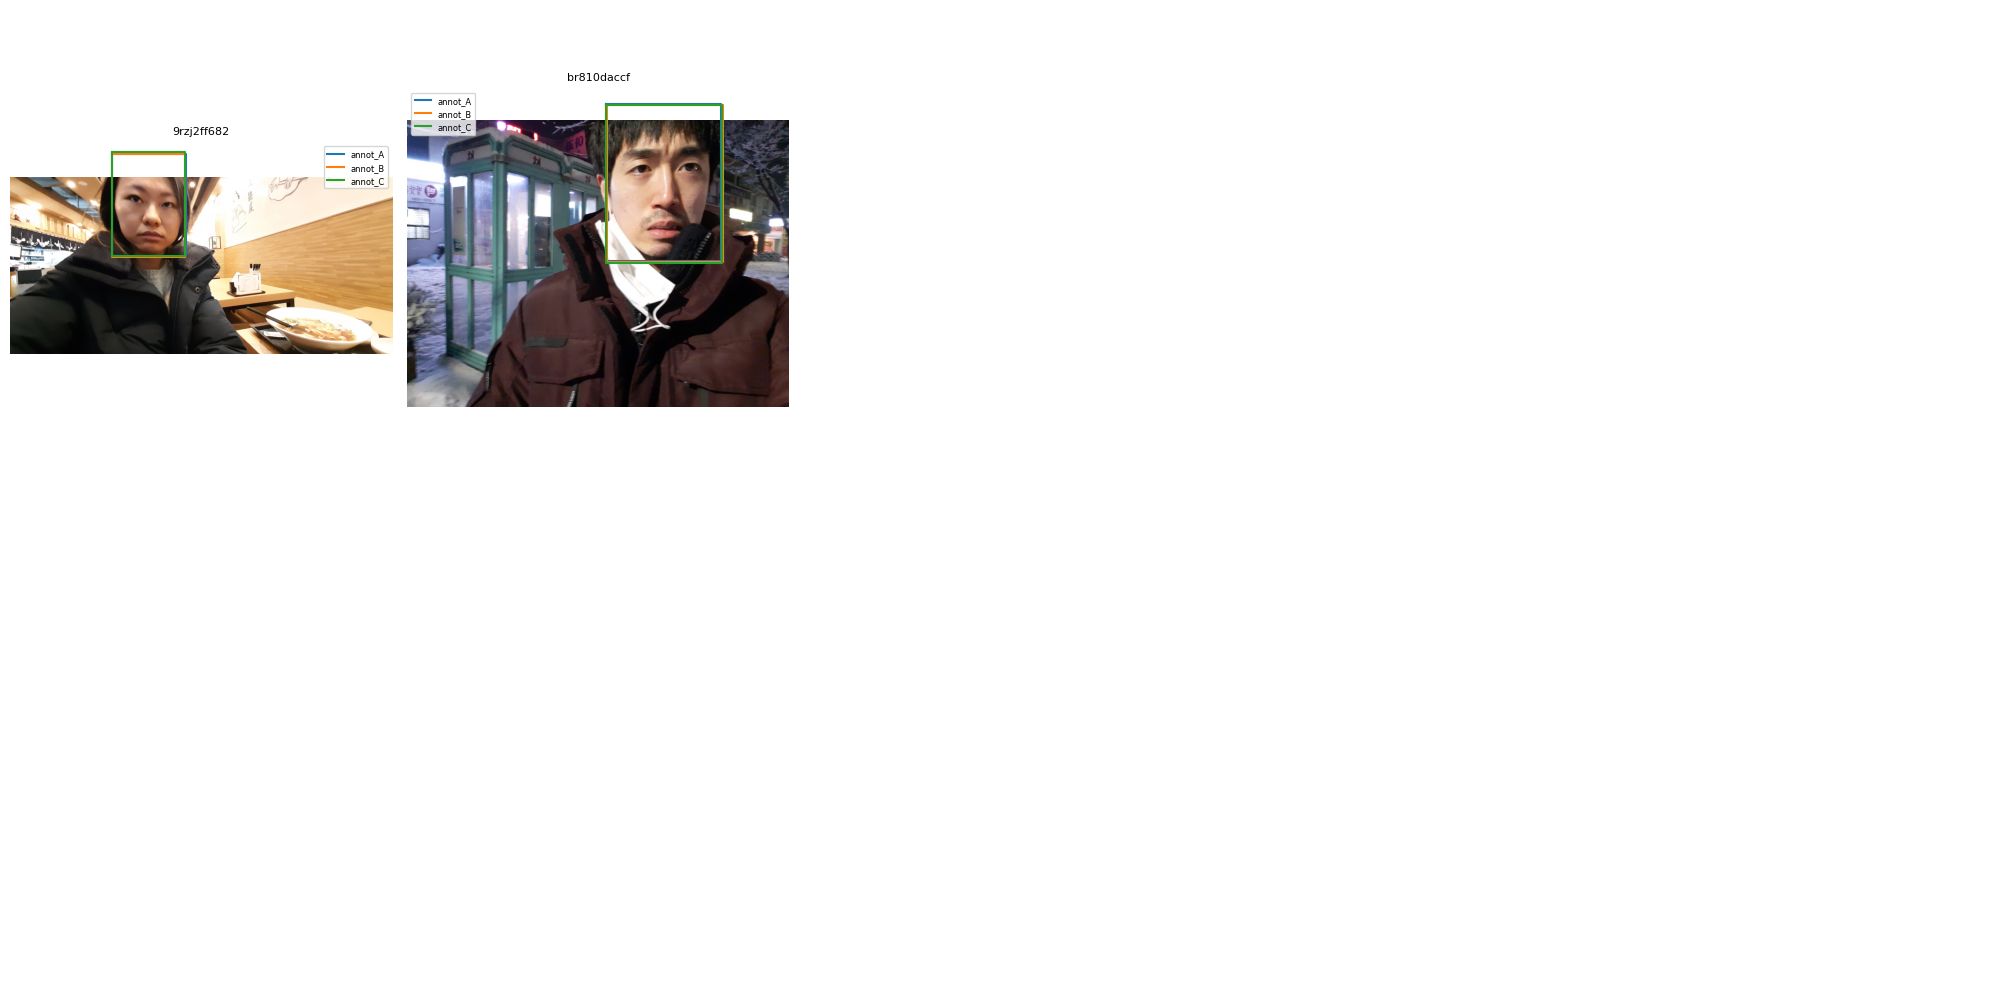

,filename,faceExp_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
125,9rzj2ff6822f42cef0544243362f0f4f2e08fdffff9a74...,분노,1500.189177,669.503384,872.514877,-204.080196,1492.322177,677.206384,870.178877,-204.783196,1493.264177,672.315384,868.073877,-218.876196,1495.258510,673.008384,870.255877,-209.246529
1119,br810daccfda5c78d9119189c2767db0d19290f2a6166a...,분노,1580.603104,703.987436,998.618554,-86.530990,1587.755105,709.520436,1004.626554,-81.759990,1582.130105,715.683436,1001.245555,-79.740990,1583.496105,709.730436,1001.496888,-82.677324


In [69]:
df_anger_minus = df_train_anger.iloc[[125,1119]]

visualize_boxes(df_anger_minus, img_path_train_anger)
df_anger_minus

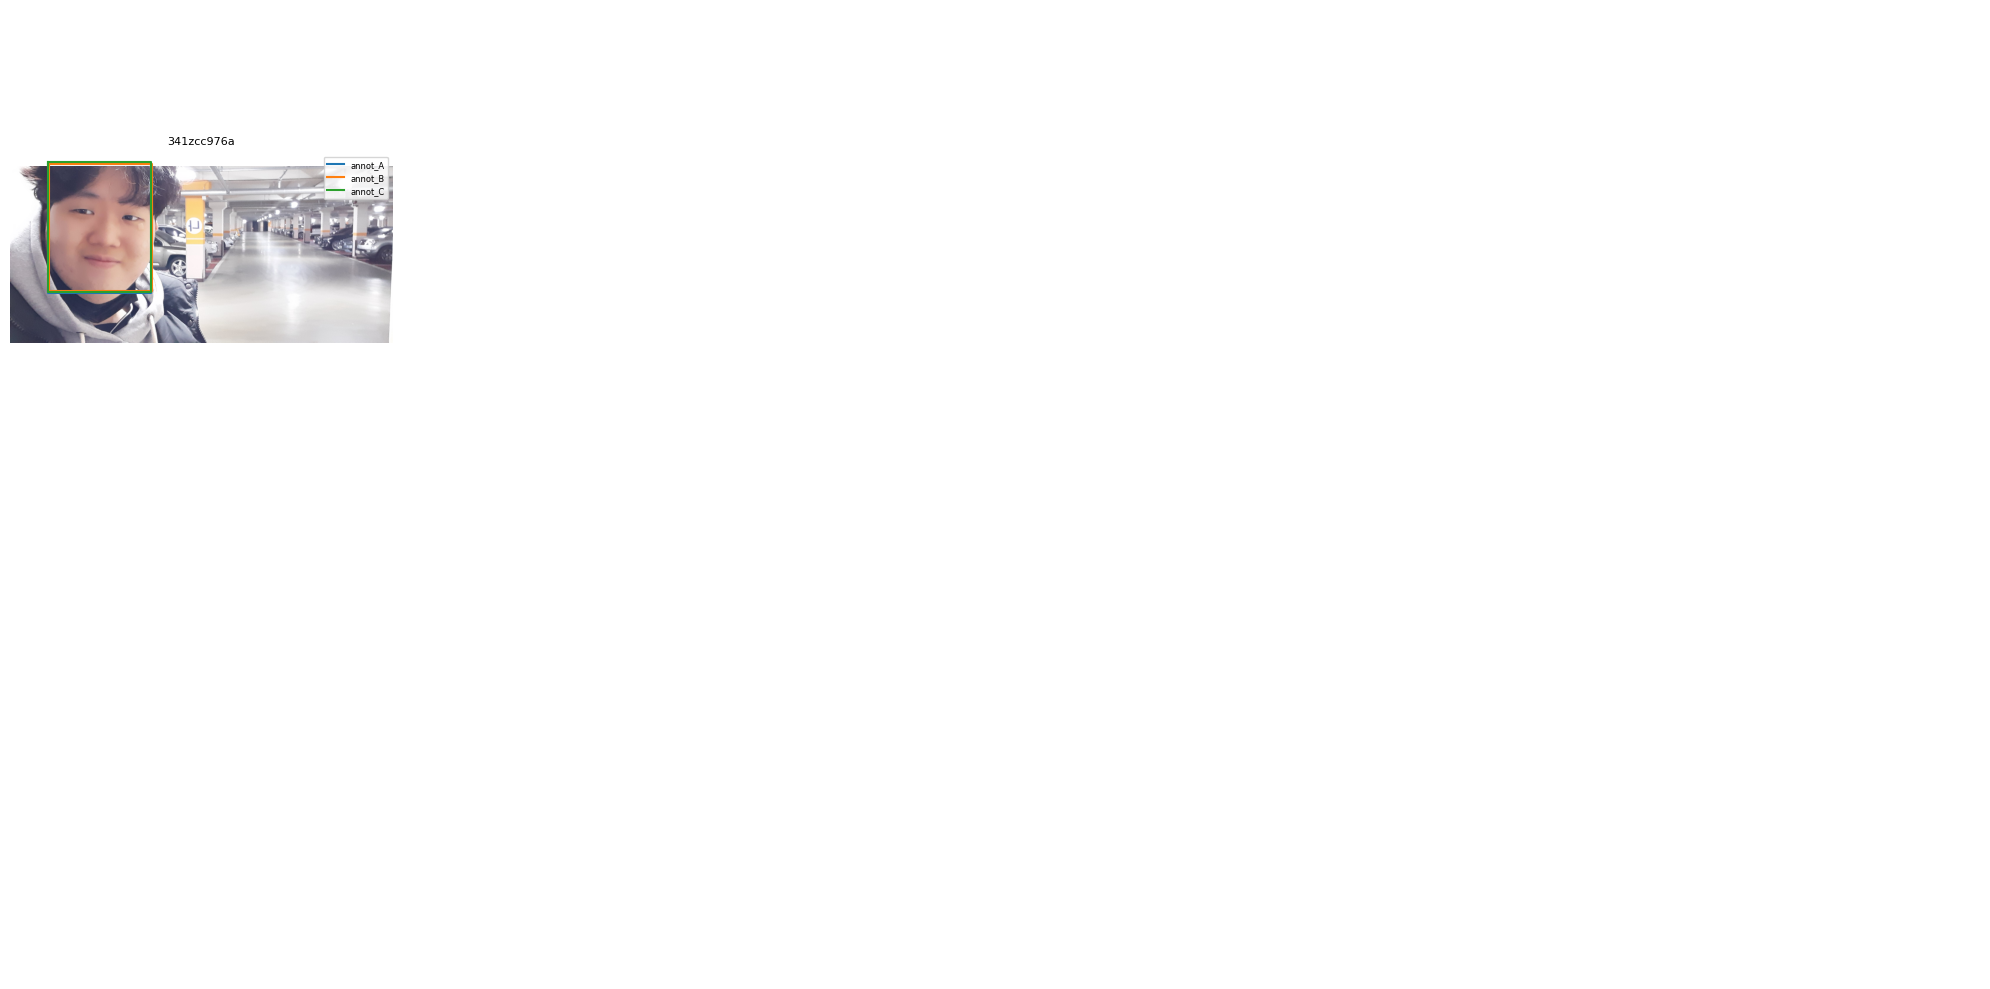

,filename,faceExp_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
189,341zcc976a81d9d8391dbdc967042a4977d9c594b924ad...,기쁨,965.926647,861.093359,257.711377,-20.929709,966.536647,851.204359,265.313377,-20.468709,962.172647,857.736359,261.228377,-36.482709,964.878647,856.678026,261.417711,-25.960375


In [70]:
df_happy_minus = df_train_happy.iloc[[189]]

visualize_boxes(df_happy_minus, img_path_train_happy)
df_happy_minus


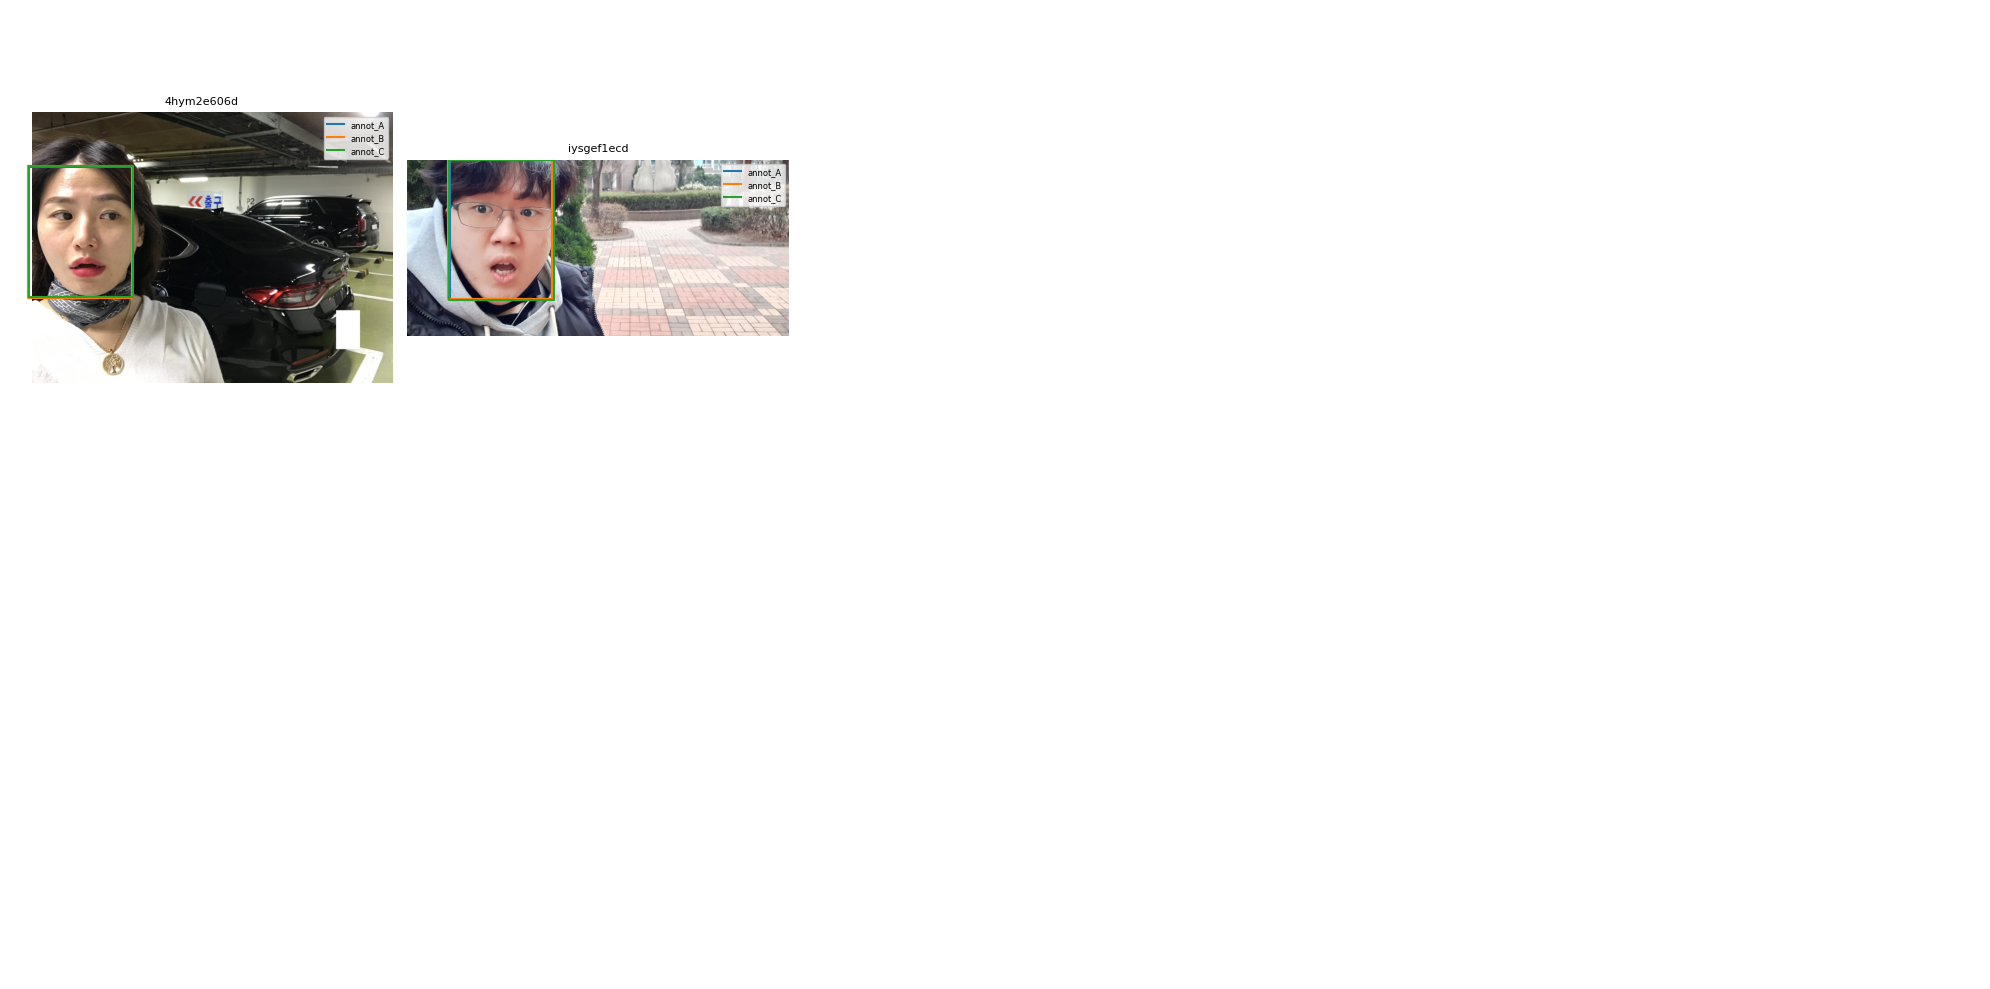

,filename,faceExp_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
61,4hym2e606d89fcf887b29e7b8b3ebfcc626c8fcf821782...,당황,863.352760,1579.754063,-27.366287,465.803363,863.923760,1591.197063,-29.669287,461.052363,866.539760,1585.717063,-23.264287,462.615363,864.605426,1585.556063,-26.766621,463.157030
663,iysgef1ecd1297c67d58c59c01349b83ed084c0cca35a9...,당황,988.003909,961.319469,293.131809,3.820389,988.264909,954.457469,281.625809,5.682389,1001.111909,956.975469,283.318809,-0.334611,992.460242,957.584136,286.025476,3.056056


In [71]:
df_panic_minus = df_train_panic.iloc[[61,663]]

visualize_boxes(df_panic_minus, img_path_train_panic)
df_panic_minus

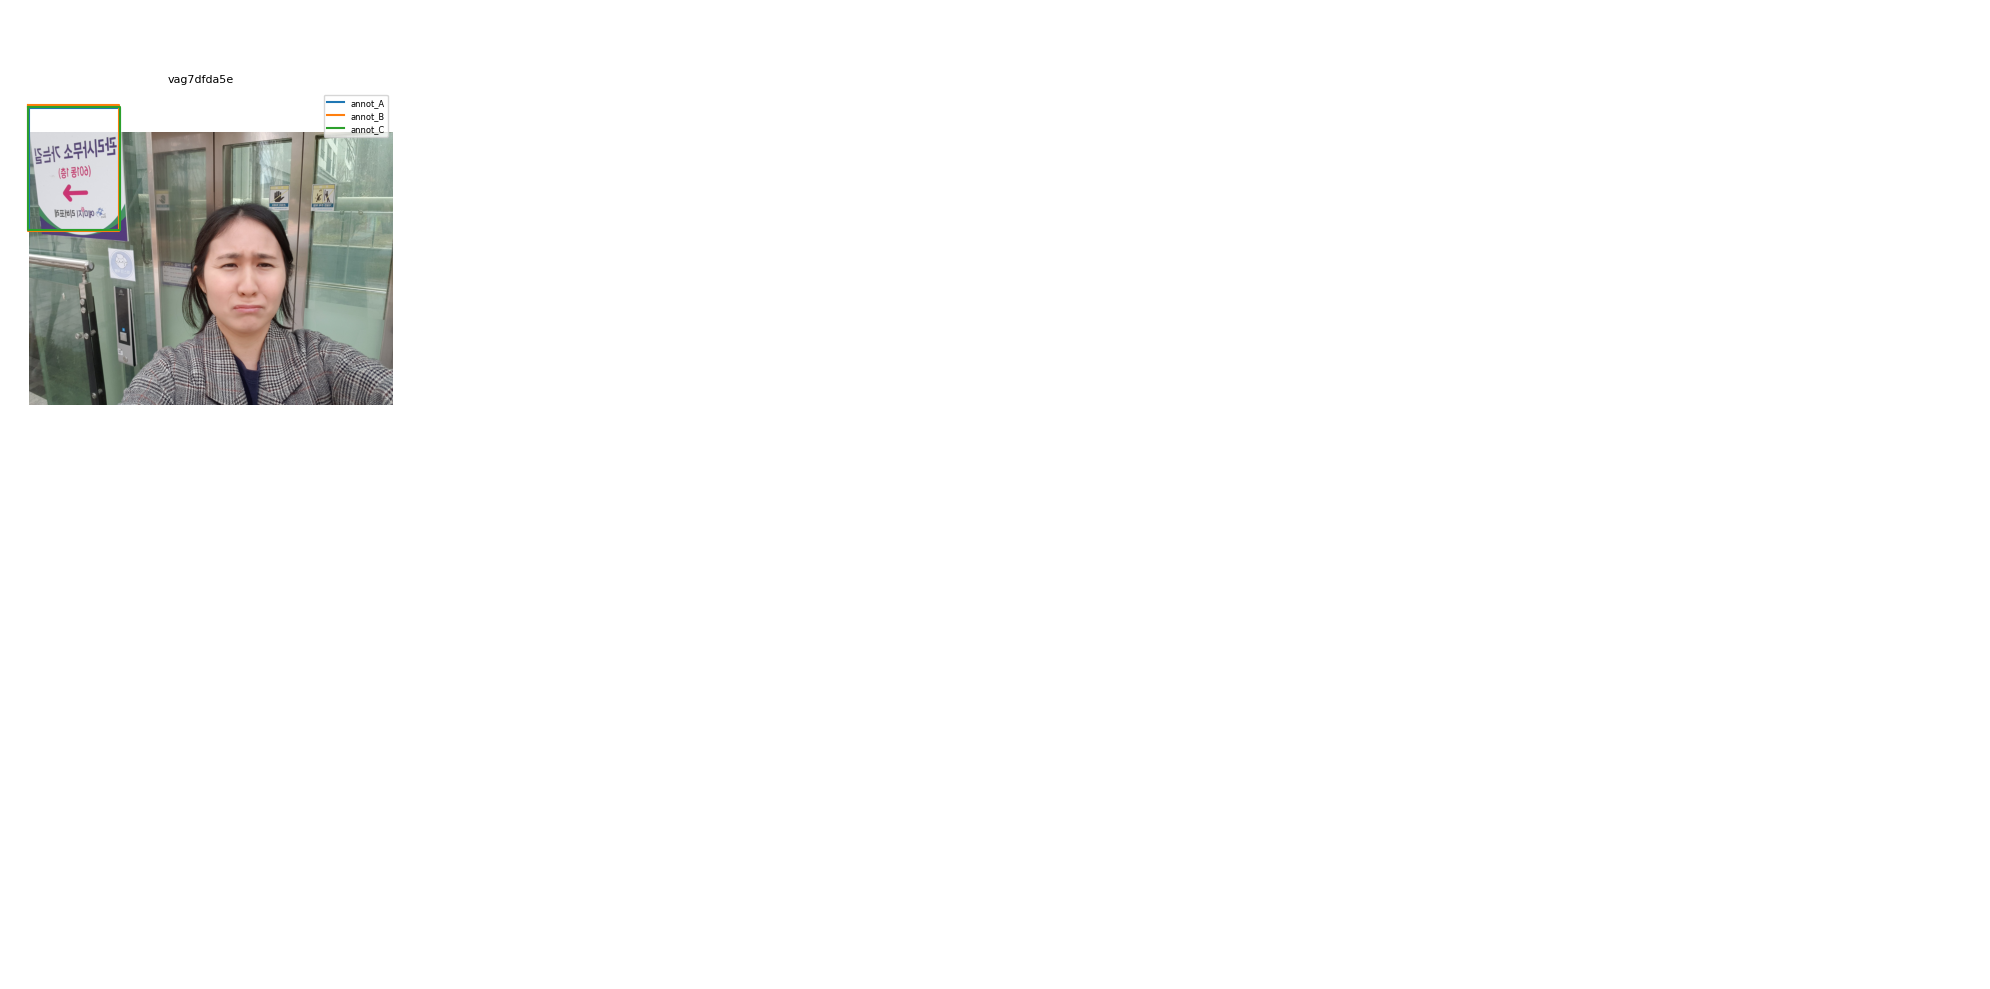

,filename,faceExp_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,avg_box.maxX,avg_box.maxY,avg_box.minX,avg_box.minY
994,vag7dfda5e3b9561fd12c1175d277b1d2c1f22dd2a5d37...,슬픔,363.189153,384.818586,0.647463,-100.632774,358.857153,390.153586,-3.404537,-108.095774,361.199153,386.673586,-2.741537,-102.393774,361.08182,387.215253,-1.83287,-103.70744


In [72]:
df_sadness_minus = df_train_sadness.iloc[[994]]

visualize_boxes(df_sadness_minus, img_path_train_sadness)
df_sadness_minus